# Determinación de la mejor ubicación para extracción de petróleo

La compañía OilyGiant nos ha entregado la tarea de encontrar la mejor ubicación para su próxima explotación de petróleo: tenemos tres datasets que corresponden a regiones donde se ha trabajado anteriormente. Procederemos a estudiar los datos y a desarrollar modelos que nos permitan predecir el número de barriles/ganancia total de la región.

## Trabajo previo

Hacemos una importación de algunas librerías útiles: `pandas` para trabajar con datos, `numpy` para algunas operaciones numéricas, `matplotlib` para graficar y algunos módulos de la paquetería `sklearn` para aprendizaje estadístico.

### Importar librerías

In [16]:
import pandas as pd
import numpy as np
#import seaborn as sns

from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression


### Cargado de datos

Partamos cargando nuestros datos, luego mostremos un sample de cada uno para echar un vistazo.

In [17]:
# Carguemos los datasets
data_0 = pd.read_csv("/datasets/geo_data_0.csv")
data_1 = pd.read_csv("/datasets/geo_data_1.csv")
data_2 = pd.read_csv("/datasets/geo_data_2.csv")

# Mostremos un sample de cada dataset
print("data_0")
display(
    data_0.sample(n=5, random_state=1)
)

print("-"*20)

print("data_1")
display(
    data_1.sample(n=5, random_state=1)
)

print("-"*20)

print("data_2")
display(
    data_2.sample(n=5, random_state=1)
)


data_0


,id,f0,f1,f2,product
43660,MUOMg,0.951436,0.296027,6.817623,89.929339
87278,OZXkj,0.800004,0.231734,-2.650680,94.203721
14317,adoVK,0.726819,-0.422117,2.645328,123.553649
81932,8rZOO,0.193998,-0.247002,-1.002114,83.166422
95321,RyFFq,0.890555,-0.498876,4.448591,146.285652


--------------------
data_1


,id,f0,f1,f2,product
43660,lkoIC,2.365991,7.466907,2.990761,80.859783
87278,CUVk0,13.475920,-10.191469,-0.000108,0.000000
14317,A4aSR,9.993776,-15.519432,2.011834,53.906522
81932,rkW6y,8.738673,-3.064249,4.003998,107.813044
95321,1CUkY,7.917746,1.232051,2.000682,53.906522


--------------------
data_2


,id,f0,f1,f2,product
43660,dCoRV,-0.804419,0.910995,2.886761,102.734478
87278,TFdxM,-0.401696,-0.024390,-1.195403,72.411400
14317,wV83L,0.101773,-1.699503,1.509664,27.076410
81932,sgdPb,-0.972245,1.907999,-3.650935,53.209936
95321,xSvzy,-0.183940,0.814632,12.021626,112.650597


Tenemos cuatro columnas, la primera es el `id` único; `f0`, `f1`, `f2` son características númericas y finalmente `product` es el target deseado. Revisemos si hay valores vacíos, o duplicados.

In [18]:
# Mostremos los datos
print("data_0")
data_0.info()

print("-"*20)

print("data_1")
data_1.info()

print("-"*20)

print("data_2")
data_2.info()

print("-"*20)

# Veamos que sucede con los duplicados

print(f"Data 0 duplicados: {data_0.duplicated(subset=['id'], keep=False).sum()}")

print(f"Data 1 duplicados: {data_1.duplicated(subset=['id'],keep=False).sum()}")

print(f"Data 2 duplicados: {data_2.duplicated(subset=['id'], keep=False).sum()}")


data_0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
--------------------
data_1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
--------------------
data_2
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 t

Parece que no tenemos ningún valor nulo, pero si duplicados por el `id` (se supone que es un indicador único), echemos un vistazo.

In [19]:
# Duplicados de data
print("data_0")
display(
    data_0[data_0.duplicated(subset=['id'], keep=False)].sort_values("id")
)
print("-"*20)

print("data_1")
display(
    data_1[data_1.duplicated(subset=['id'], keep=False)].sort_values("id")
)
print("-"*20)

print("data_2")
display(
    data_2[data_2.duplicated(subset=['id'], keep=False)].sort_values("id")
)

data_0


,id,f0,f1,f2,product
66136,74z30,1.084962,-0.312358,6.990771,127.643327
64022,74z30,0.741456,0.459229,5.153109,140.771492
51970,A5aEY,-0.180335,0.935548,-2.094773,33.020205
3389,A5aEY,-0.039949,0.156872,0.209861,89.249364
69163,AGS9W,-0.933795,0.116194,-3.655896,19.230453
42529,AGS9W,1.454747,-0.479651,0.683380,126.370504
931,HZww2,0.755284,0.368511,1.863211,30.681774
7530,HZww2,1.061194,-0.373969,10.430210,158.828695
63593,QcMuo,0.635635,-0.473422,0.862670,64.578675
1949,QcMuo,0.506563,-0.323775,-2.215583,75.496502


--------------------
data_1


,id,f0,f1,f2,product
5849,5ltQ6,-3.435401,-12.296043,1.999796,57.085625
84461,5ltQ6,18.213839,2.191999,3.993869,107.813044
1305,LHZR0,11.170835,-1.945066,3.002872,80.859783
41906,LHZR0,-8.989672,-4.286607,2.009139,57.085625
2721,bfPNe,-9.494442,-5.463692,4.006042,110.992147
82178,bfPNe,-6.202799,-4.820045,2.995107,84.038886
47591,wt4Uk,-9.091098,-8.109279,-0.002314,3.179103
82873,wt4Uk,10.259972,-9.376355,4.994297,134.766305


--------------------
data_2


,id,f0,f1,f2,product
45404,KUPhW,0.231846,-1.698941,4.990775,11.716299
55967,KUPhW,1.211150,3.176408,5.543540,132.831802
11449,VF7Jo,2.122656,-0.858275,5.746001,181.716817
49564,VF7Jo,-0.883115,0.560537,0.723601,136.233420
44378,Vcm5J,-1.229484,-2.439204,1.222909,137.968290
95090,Vcm5J,2.587702,1.986875,2.482245,92.327572
28039,xCHr8,1.633027,0.368135,-2.378367,6.120525
43233,xCHr8,-0.847066,2.101796,5.597130,184.388641


Parece que los valores de `id` no siempre son únicos: al menos en el primer dataset tenemos 20 duplicados. Ahora, tratemos de darle sentido a esto; cada entrada son los parámetros de las observaciones de un pozo, si tenemos más de una entrada por id indica que esas observaciones se hicieron varias veces: por ejemplo, si se hicieran a lo largo del tiempo. ¿Cómo proceder? Podríamos tomar un promedio de todas y quedarnos con esa, pero esto generaría un problema ya que las observaciones en ocasiones son muy distintas, el promedio no sería representativa de ninguna. En todo caso, es mejor quedarnos con solo una de todas, tomaremos la primera.

In [20]:
# Eliminar duplicados
data_0 = data_0.drop_duplicates(subset=["id"], keep="first")
data_1 = data_1.drop_duplicates(subset=["id"], keep="first")
data_2 = data_2.drop_duplicates(subset=["id"], keep="first")

# Veamos si hay duplicados
print(f"Data 0 duplicados: {data_0.duplicated(subset=['id'], keep=False).sum()}")
print("-"*20)

print(f"Data 1 duplicados: {data_1.duplicated(subset=['id'], keep=False).sum()}")
print("-"*20)

print(f"Data 2 duplicados: {data_2.duplicated(subset=['id'], keep=False).sum()}")

Data 0 duplicados: 0
--------------------
Data 1 duplicados: 0
--------------------
Data 2 duplicados: 0


Nuestros datos ya están mejor, perdimos unos cuantos registros, pero empezamos con 100,000 así que no es realmente un golpe muy duro. Procedamos a trabajar con nuestro modelo.

## Modelado

Empezaremos removiendo la columna `id` ya que no la necesitaremos, posteriormente dividiremos nuestros datos por región en conjuntos de entrenamiento/validación a 75:25. Entrenaremos y predeciremos para posteriormente calcular algunas métricas relevantes para los datos predichos.

### Preparar datos
No necesitaremos la columna `id`, y nos estorbara para los resultados, la removeremos. También separaremos en los dos conjuntos necesarios.

In [21]:
# Removeremos los id
data_0 = data_0.drop(["id"], axis=1)
data_1 = data_1.drop(["id"], axis=1)
data_2 = data_2.drop(["id"], axis=1)

# Haremos los cálculos para las tres regiones, podemos simplificar esto en un ciclo for o una función nueva
# pero la prueba y error de hacerlo es más tardado, y solo lo haremos tres veces.

# Para región 0
data_0_features_train, data_0_features_valid, data_0_target_train, data_0_target_valid = train_test_split(
    data_0.drop(["product"], axis=1), data_0["product"], test_size=0.25, random_state=1
)

# Para región 1
data_1_features_train, data_1_features_valid, data_1_target_train, data_1_target_valid = train_test_split(
    data_1.drop(["product"], axis=1), data_1["product"], test_size=0.25, random_state=1
)

# Para región 2
data_2_features_train, data_2_features_valid, data_2_target_train, data_2_target_valid = train_test_split(
    data_2.drop(["product"], axis=1), data_2["product"], test_size=0.25, random_state=1
)

### Modelo de regresión lineal

Utilizaremos un modelo de regresión lineal para cada región y calcularemos el RMSE.

In [22]:
# Definimos los modelos
model_0 = LinearRegression()
model_1 = LinearRegression()
model_2 = LinearRegression()

# Convertimos los valores en series en vez de arrays porque es más útil
# Región 0
model_0.fit(data_0_features_train, data_0_target_train) 
predictions_valid_0 = pd.Series(model_0.predict(data_0_features_valid))

result_0 = mean_squared_error(data_0_target_valid, predictions_valid_0) ** 0.5

# Región 1
model_1.fit(data_1_features_train, data_1_target_train) 
predictions_valid_1 = pd.Series(model_1.predict(data_1_features_valid))

result_1 = mean_squared_error(data_1_target_valid, predictions_valid_1) ** 0.5

# Región 2
model_2.fit(data_2_features_train, data_2_target_train) 
predictions_valid_2 = pd.Series(model_2.predict(data_2_features_valid))

result_2 = mean_squared_error(data_2_target_valid, predictions_valid_2) ** 0.5


Hemos calculado los valores de los modelos y las predicciones, mostremóslas en una tabla.

In [23]:
# Mostremos algunas métricas importantes que hemos calculado.

dict_resultados_modelos = {
        #"Región": [0, 1, 2],
        "Promedio": [predictions_valid_0.mean(), predictions_valid_1.mean(), predictions_valid_2.mean()],
        "RMSE": [result_0, result_1, result_2]
}

# Mostremos en una tabla
display(
    pd.DataFrame(dict_resultados_modelos)
)

,Promedio,RMSE
0,92.546292,37.526919
1,68.848731,0.890310
2,94.967485,39.984142


Interesante, tenemos un promedio alto en la región 0 y 2, pero el error cuadrático medio (RMSE) es mucho más alto en estos dos, mientrás que el promedio es mucho más bajo en la región 1 pero RMSE es menor a 1: podemos interpretarlo así, las regiones 1 y 2 tienen valores más dispersos y aunque el promedio es mayor, se debe a que hay algunos puntos con valores sensiblemente más grandes que otros.

## Cálculo de reservas mínimas

Tenemos que calcular el promedio de producto (miles de barriles de petróleo) que debemos de explotar de cada pozo para obtener ganancias. Definamos unos párametros útiles: 500 pozos a explorar, obtener los 200 mejores para explotar y un ingreso de 4500 dólares por producto de ingreso; hagamos unos cálculos rápidos para saber cuantas unidades de producto se necesitan por pozo.


In [24]:
# Definamos algunos párametros
PUNTOS_SELECT = 500
PUNTOS_MEJORES = 200

POZOS_A_DESARROLLAR = 200
INGRESO_POR_PROD = 4500

PRESUPUESTO = 100_000_000

# Mostremos la métrica
print(
    (
        f"Se necesitan {(PRESUPUESTO / INGRESO_POR_PROD) / POZOS_A_DESARROLLAR:.4f}"
        " en promedio por pozo explotado para obtener ganancias."
    )
)


Se necesitan 111.1111 en promedio por pozo explotado para obtener ganancias.


Necesitamos tener un poco menos de 112 unidades de producto por pozo explotado, esto nos causa ruido, ya que nuestras regiones tienen menos 100 unidades en promedio: tenemos que volver a echar a un vistazo a la distribución del producto en las regiones. Si solo tomaramos el promedio, tendríamos problemas, pero como hay una desviación **siempre habrá pozos con mucho más productos que el promedio** y son esos los que debemos de intentar explotar. Grafiquemos histogramas de los productos por región para ver como se distribuyen.

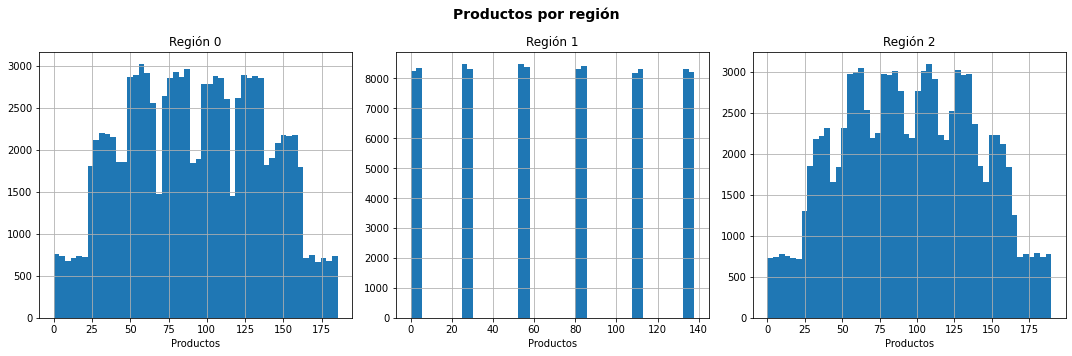

In [25]:
# Definamos los elementos del plot
fig, ax = plt.subplots(1,3, figsize=(15, 5))

# Hagamos la gráfica
data_0["product"].hist(ax=ax.flat[0], bins=50)
data_1["product"].hist(ax=ax.flat[1], bins=50)
data_2["product"].hist(ax=ax.flat[2], bins=50)

# Pongamos labels
ax[0].set_title("Región 0")
ax[1].set_title("Región 1")
ax[2].set_title("Región 2")

ax[0].set_xlabel("Productos")
ax[1].set_xlabel("Productos")
ax[2].set_xlabel("Productos")

#ax[2].vlines(80, 0, 3000)
#plt.axvline(x=81, color='k', linewidth=1.0, linestyle='--') 

plt.suptitle("Productos por región", size=14.0, fontweight=600)
plt.tight_layout()
plt.show()

Interesante, la región 0 y 2 se distribuyen más similar a a una gaussiana, mientrás que en la región 1 el número de productos por punto parece ser muy similar. Queremos trabajar con puntos que tengan más productos que la media, al menos ~112 unidades de producto: el problema de la región 1, es que solo tenemos pozos con ~110 y ~135 unidades, y todos los demás son menores, pero en las regiones 0 y 2 hay más candidatos para ser elegidos. Necesitamos echar mano de un cálculo más detallado para dar una respuesta.

## Cálculo de ganancias
### Mejores pozos
Calculemos primero los ingresos para los mejores 200 pozos que tenemos en cada región: multiplicaremos aquellos con el pronóstico más alto y multipĺicaremos el valor por el ingreso por producto y le restaremos el presupuesto (2 millones en total).

In [26]:
# Definamos una función que genera las ganancias y si es positiva
def func_ganancia_region(predicciones, numero_puntos):
    top_puntos = predicciones.sort_values(ascending=False).head(numero_puntos)
    
    ganancia = top_puntos.sum()*INGRESO_POR_PROD - PRESUPUESTO
    
    return (ganancia, ganancia > 0)

# Imprimamos las ganancias
print(f"Mejor ganancia Región 0: ${func_ganancia_region(predictions_valid_0, PUNTOS_MEJORES)[0]:,.2f} dólares")
print(f"Mejor ganancia Región 1: ${func_ganancia_region(predictions_valid_1, PUNTOS_MEJORES)[0]:,.2f} dólares")
print(f"Mejor ganancia Región 2: ${func_ganancia_region(predictions_valid_2, PUNTOS_MEJORES)[0]:,.2f} dólares")

Mejor ganancia Región 0: $39,695,933.96 dólares
Mejor ganancia Región 1: $24,904,598.79 dólares
Mejor ganancia Región 2: $34,094,829.57 dólares


Parece que en base a este cálculo, nuestra región claramente ganadora es la región 0, pero no podemos elegir solo los mejores en una zona en la realidad; haremos un análisis estadístico con bootstraping para poder ver cual es el escenario que podría resultar.

### Bootstraping: prueba de 500 pozos

In [27]:
# Hagamos el bootstraping de 1000 muestras, con el número de pozos
state = np.random.RandomState(1)

# Función que hace el bootstraping de los datos
def bootstrap(data):
    list_ingresos = []
    list_ganancias = []
    list_positivos = []
    
    for _ in range(1000):
        subsample = data.sample(n=PUNTOS_SELECT, replace=False, random_state=state).reset_index(drop=True)

        # Append tres valores: cuanto genera, cuanto gana y si es positivo
        list_ingresos.append(subsample.sum())
        list_ganancias.append(func_ganancia_region(subsample, POZOS_A_DESARROLLAR)[0])
        list_positivos.append(func_ganancia_region(subsample, POZOS_A_DESARROLLAR)[1])
        
    return pd.DataFrame(
        {
            "producto": list_ingresos,
            "ganancias": list_ganancias,
            "positivos": list_positivos
        }
    )

# Hagamos el bootstrap para las tres predicciones
bootstrap_results_0 = bootstrap(predictions_valid_0)
bootstrap_results_1 = bootstrap(predictions_valid_1)
bootstrap_results_2 = bootstrap(predictions_valid_2)

In [28]:
# Juntemos los resultados en un dataframe

dict_bootstrap = {
        #"Región": [0, 1, 2],
        "product_mean": [
            f"{bootstrap_results_0.producto.mean():,.2f}",
            f"{bootstrap_results_1.producto.mean():,.2f}",
            f"{bootstrap_results_2.producto.mean():,.2f}"
        ],
        "ganancias_mean": [
            f"${bootstrap_results_0.ganancias.mean():,.2f}",
            f"${bootstrap_results_1.ganancias.mean():,.2f}",
            f"${bootstrap_results_2.ganancias.mean():,.2f}"
        ],
        "perdidas_prob": [
            f"{(1-bootstrap_results_0.positivos.mean())*100:,.1f}%",
            f"{(1-bootstrap_results_1.positivos.mean())*100:,.1f}%",
            f"{(1-bootstrap_results_2.positivos.mean())*100:,.1f}%",
        ],
        "intervalo_95": [
            f"{bootstrap_results_0.ganancias.quantile(0.025):,.2f} - {bootstrap_results_0.ganancias.quantile(0.0975):,.2f}",
            f"{bootstrap_results_1.ganancias.quantile(0.025):,.2f} - {bootstrap_results_1.ganancias.quantile(0.0975):,.2f}",
            f"{bootstrap_results_2.ganancias.quantile(0.025):,.2f} - {bootstrap_results_2.ganancias.quantile(0.0975):,.2f}"
        ]
}

# Mostremos en una tabla
display(
    pd.DataFrame(dict_bootstrap)
)

,product_mean,ganancias_mean,perdidas_prob,intervalo_95
0,"46,245.89","$3,440,940.10",0.3%,"1,039,063.50 - 1,909,596.96"
1,"34,422.75","$4,364,693.54",0.9%,"662,659.02 - 1,906,259.43"
2,"47,465.79","$2,866,393.28",0.2%,"879,948.02 - 1,610,329.74"


Grafiquemos el histograma de como se distribuyen las ganancias.

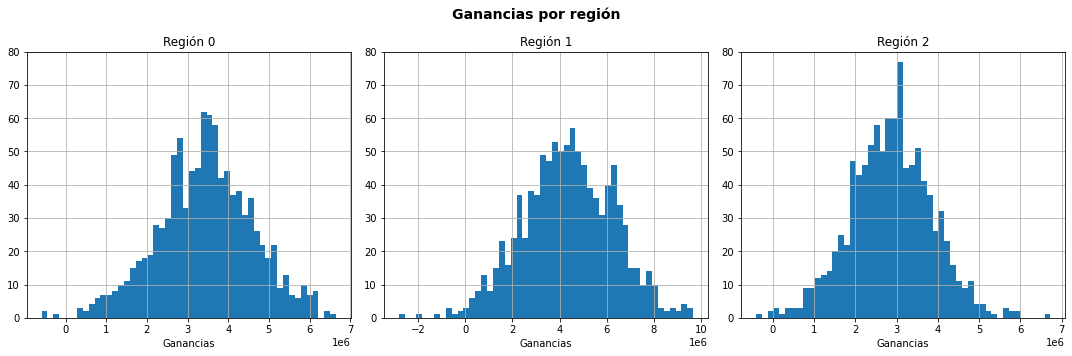

In [29]:
# Definamos los elementos del plot
fig, ax = plt.subplots(1,3, figsize=(15, 5))

# Hagamos la gráfica
bootstrap_results_0.ganancias.hist(ax=ax.flat[0], bins=50)
bootstrap_results_1.ganancias.hist(ax=ax.flat[1], bins=50)
bootstrap_results_2.ganancias.hist(ax=ax.flat[2], bins=50)

# Pongamos labels
ax[0].set_title("Región 0")
ax[1].set_title("Región 1")
ax[2].set_title("Región 2")

ax[0].set_xlabel("Ganancias")
ax[1].set_xlabel("Ganancias")
ax[2].set_xlabel("Ganancias")

ax[1].ticklabel_format(axis='x', scilimits=[6, 6])
ax[0].set_ylim([0,80])
ax[1].set_ylim([0,80])
ax[2].set_ylim([0,80])

plt.suptitle("Ganancias por región", size=14.0, fontweight=600)
plt.tight_layout()
plt.show()

Interesante, nótese que la región 0 y 2 se parecen mucho en la distribución de ganancias, mientrás que la región 1 es la que más probable es a generar pérdidas. También, el intervalo del intervalo de confianza del 95% es muy amplio en las tres regiones, pero es claro que es mucho más atractivo en la región 0: aunque la probabilidad de pérdidas es mayor al de la región 2 (tan solo una centesima más), el intervalo es mejor; una advertencia, aunque el promedio se ve desorbitante en las regiones, esto es porque hay muchos _outliers_ y es mejor considerar el intervalo del 95% al tomar la decisión: por esto, **se recomienda la región 0 como la mejor candidata**.

## Conclusiones

Hemos tomado un conjunto de datos reales, con features anónimas y hemos procedido a construir modelos que permiten obtener una regresión útil de su producción e ingresos. Con estos tomamos una decisión empresarial de que región es mejor desarrollar con una perspectiva de negocio: esto es un escenario más realista, a pesar de ser modesto en su extensión.